In [18]:
import numpy as np
from utils import read_raw, read_rgb, read_data, read_envi_ascii
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from machine_learning import DecisionTree, svm_classifier, RandomForest, AdaBoost, GradientBoosting, XGBoost, MLP, predict
import cv2

In [19]:
data = read_envi_ascii('data/biaotu.txt')
huangqi = data['huangqi'][:,:40]
zazhi1 = data['zazhi1'][:,:40]
zazhi2 = data['zazhi2'][:,:40]
beijing = data['beijing'][:,:40]
gancaopian = data['gancaopian'][:,:40]
hongqi = data['hongqi'][:,:40]
huangqi_y = np.ones(huangqi.shape[0]) * 3
zazhi1_y = np.ones(zazhi1.shape[0]) * 1
zazhi2_y = np.ones(zazhi2.shape[0]) * 2
beijing_y = np.ones(beijing.shape[0]) * 0
gancaopian_y = np.ones(gancaopian.shape[0]) * 4
hongqi_y = np.ones(hongqi.shape[0]) * 5

In [20]:
data_x = np.concatenate((beijing, huangqi, zazhi1, zazhi2, gancaopian, hongqi), axis=0)
data_y = np.concatenate((beijing_y, huangqi_y, zazhi1_y, zazhi2_y, gancaopian_y, hongqi_y), axis=0)

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)

In [22]:
file_name = 'models/dt.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name)

预测时间： 0.0
DT训练模型评分：1.0
DT待测模型评分：0.8264887063655031
DT预测结果：[5. 0. 4. 3. 0. 2. 3. 1. 2. 4. 1. 0. 1. 2. 4. 1. 5. 2. 4. 4. 3. 4. 0. 5.
 4. 4. 2. 2. 1. 0. 5. 2. 2. 1. 3. 2. 0. 5. 0. 0. 0. 3. 3. 4. 1. 2. 5. 2.
 5. 3. 4. 0. 5. 2. 2. 0. 5. 0. 5. 3. 5. 1. 3. 1. 1. 3. 1. 4. 4. 5. 5. 3.
 5. 3. 5. 0. 4. 1. 3. 4. 5. 5. 4. 0. 0. 5. 3. 5. 5. 3. 2. 2. 5. 3. 3. 1.
 1. 4. 0. 2. 4. 1. 2. 4. 0. 5. 3. 4. 3. 5. 1. 5. 1. 5. 0. 3. 4. 0. 5. 4.
 1. 2. 2. 5. 4. 4. 2. 0. 3. 2. 0. 0. 5. 5. 4. 5. 1. 3. 2. 1. 2. 0. 1. 4.
 1. 1. 2. 0. 0. 0. 1. 4. 3. 3. 5. 4. 0. 2. 3. 3. 5. 3. 1. 3. 3. 0. 1. 2.
 3. 1. 2. 1. 5. 3. 0. 5. 0. 4. 4. 2. 2. 3. 5. 4. 4. 1. 0. 3. 2. 2. 2. 4.
 5. 2. 2. 4. 3. 0. 1. 1. 3. 4. 3. 5. 2. 3. 5. 3. 2. 0. 5. 0. 1. 3. 2. 5.
 3. 0. 1. 0. 1. 5. 4. 0. 1. 2. 5. 3. 5. 5. 0. 1. 0. 1. 4. 4. 4. 3. 1. 2.
 3. 1. 3. 0. 2. 0. 5. 5. 1. 3. 0. 5. 0. 0. 0. 2. 5. 2. 0. 0. 2. 4. 4. 0.
 0. 3. 4. 3. 2. 1. 3. 2. 0. 1. 4. 3. 1. 1. 3. 4. 4. 2. 1. 4. 3. 3. 5. 5.
 2. 4. 0. 4. 1. 0. 3. 1. 4. 1. 2. 0. 5. 1. 0. 0. 5. 5. 2. 1. 2. 0.

In [23]:
max_value = np.max(beijing, axis=0)
min_value = np.min(beijing, axis=0)

In [24]:
bands = np.arange(0, 40)
data = read_raw('data/newrawfile_ref.raw', shape=(750, 288, 384), setect_bands=bands)

In [25]:
# 建立一个和data一样长和款大小的全1矩阵
data_o = np.ones((data.shape[0], data.shape[1]))

In [26]:
# 将data中满足条件的位置赋值为0， 条件为data中的[:, :, 2] 小于 0.15，大于0.015，且data中的[:, :, 8] 小于0.15，大于0.02
data_o[(data[:, :, 2] < 0.15) & (data[:, :, 2] > 0.015) & (data[:, :, 8] < 0.15) & (data[:, :, 8] > 0.02)] = 0

In [27]:
# 将data_o中的值为1的位置的data按顺序取出
data_x = data[data_o == 1]

In [28]:
data_y = predict(data_x, 'models/dt.p')

预测时间： 0.011968851089477539


In [29]:
# 将data_y按顺序填到data_o中值为1的位置
data_o[data_o == 1] = data_y

In [30]:
data_o = data_o.reshape((data.shape[0], data.shape[1])).astype(np.uint8)

In [31]:
# 自适应中值滤波
def adaptive_median_filter(img, max_size):
    # 定义滤波器的初始大小
    size = 3
    # 复制输入图像
    filtered = np.copy(img)
    # 获取图像的行数和列数
    rows, cols = img.shape[:2]
    # 遍历图像的每一个像素
    for i in range(rows):
        for j in range(cols):
            # 获取当前像素的邻域
            neighborhood = img[max(0, i-size):min(rows, i+size+1), max(0, j-size):min(cols, j+size+1)]
            # 计算邻域的中值
            median = np.median(neighborhood)
            # 如果当前像素的值不在邻域的最小值和最大值之间，则扩大滤波器的大小
            if img[i, j] < np.min(neighborhood) or img[i, j] > np.max(neighborhood):
                size += 2
                # 如果滤波器的大小超过了最大值，则停止滤波
                if size > max_size:
                    return filtered
                # 重新计算邻域和中值
                neighborhood = img[max(0, i-size):min(rows, i+size+1), max(0, j-size):min(cols, j+size+1)]
                median = np.median(neighborhood)
            # 将当前像素的值设置为邻域的中值
            filtered[i, j] = median
    return filtered
data_o = adaptive_median_filter(data_o, 10)

In [32]:
# # 连通域分析
# from scipy import ndimage
# labels, num_features = ndimage.label(data_o)
# for i in range(1, num_features + 1):
#     mask = (labels == i)
#     counts = np.bincount(data_o[mask])
#     max_class = np.argmax(counts)
#     data_o[mask] = max_class

In [33]:
result = data_o
pre_pic_colored = np.zeros((result.shape[0], result.shape[1], 3), dtype=np.uint8)

pre_pic_colored[result == 0] = [0, 0, 0]
pre_pic_colored[result == 1] = [255, 0, 0]
pre_pic_colored[result == 2] = [0, 255, 0]
pre_pic_colored[result == 3] = [0, 0, 255]
pre_pic_colored[result == 4] = [255, 255, 0]
pre_pic_colored[result == 5] = [255, 0, 255]

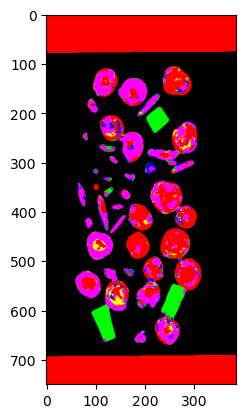

In [34]:
plt.imshow(pre_pic_colored)
plt.savefig('1.png')